In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
climber_all_clean = pd.read_csv('/content/drive/MyDrive/IA/6to sem/Machine Learning/Proyecto Final/Climbing-Data-Analysis/data/climber_all_clean.csv')
climber_df = pd.read_csv('/content/drive/MyDrive/IA/6to sem/Machine Learning/Proyecto Final/Climbing-Data-Analysis/data/grades.csv')
preprocessed_grades = pd.read_csv('/content/drive/MyDrive/IA/6to sem/Machine Learning/Proyecto Final/Climbing-Data-Analysis/data/climber_df.csv')
print(climber_all_clean.head(10))


   Unnamed: 0 country  sex  height  weight   age  years_cl  grades_max  \
0           0     SWE    0     177      73  25.0         5          62   
1           1     SWE    0     180      78  27.0         5          59   
2           2     NOR    0     177      68  37.0        14          53   
3           3     BEL    0     180      68  21.0         6          49   
4           4     CAN    0     180      68  45.0        29          64   
5           5     GBR    0     178      73  35.0        24          71   
6           6     NLD    0     178      78  28.0         4          53   
7           7     SWE    0     181      68  27.0        11          62   
8           8     SWE    0     182      68  21.0         7          62   
9           9     SWE    0     183      73  29.0         7          62   

   grades_mean  year_last max_fra  
0    46.750000       2001  8a+/8b  
1    52.833333       2000      8a  
2    51.400000       2010     7b+  
3    37.250000       2002     7a+  
4    

In [ ]:
print(preprocessed_grades.head(10))



   user_id country  sex  height  weight   age  years_cl           date_first  \
0        1     SWE    0     177      73  41.0        21  1999-02-06 23:00:00   
1        3     SWE    0     180      78  44.0        22  1999-03-31 22:00:00   
2        4     SWE    1     165      58  33.0        16  2004-06-30 22:00:00   
3       10     SWE    0     167      63  52.0        25  2000-01-14 23:00:00   
4       16     NOR    0     177      68  44.0        21  1998-02-27 23:00:00   
5       17     SWE    0     193      78  42.0        17  2001-06-19 22:00:00   
6       19     BEL    0     180      68  36.0        21  2000-08-07 22:00:00   
7       28     CAN    0     180      68  45.0        29  2000-09-01 22:00:00   
8       34   other    0     180      68  21.0        24  1999-12-31 23:00:00   
9       38     GBR    0     178      73  35.0        24  2000-11-03 23:00:00   

             date_last  grades_count  grades_first  grades_last  grades_max  \
0  2001-07-31 22:00:00            84    

##Preprocessing the data

In [ ]:
# Guardamos grades_max
grades_max = preprocessed_grades['grades_max']
preprocessed_grades = preprocessed_grades.drop('grades_max', axis=1)
# Los quitamos porque no podemos usar tipo de dato string
preprocessed_grades = preprocessed_grades.drop('country', axis=1)
preprocessed_grades = preprocessed_grades.drop('date_first', axis=1)
preprocessed_grades = preprocessed_grades.drop('date_last', axis=1)

# agregamos grades_max de nuevo a los datos pero ahora va a quedar en la ultima columna
preprocessed_grades = pd.concat([preprocessed_grades, grades_max], axis=1)

grades_df = preprocessed_grades

print(grades_df.shape)



(10927, 13)


In [ ]:
grades_df.drop('user_id', axis=1)
print(grades_df.head(5))
X = grades_df.iloc[:, :-1].values
print(X.shape)
Y = grades_df['grades_max'].values

   user_id  sex  height  weight   age  years_cl  grades_count  grades_first  \
0        1    0     177      73  41.0        21            84            36   
1        3    0     180      78  44.0        22            12            53   
2        4    1     165      58  33.0        16           119            53   
3       10    0     167      63  52.0        25           298            53   
4       16    0     177      68  44.0        21             5            53   

   grades_last  grades_mean  year_first  year_last  grades_max  
0           55    46.750000        1999       2001          62  
1           51    52.833333        1999       2000          59  
2           49    53.890756        2004       2009          64  
3           49    49.406040        2000       2017          63  
4           49    51.400000        1998       2010          53  
(10927, 12)


##Dimensionality Reduction

(10927, 2)
Cargas del Componente Principal 1:
Característica 1: 0.9999996174385228
Característica 2: 1.1847262569228672e-06
Característica 3: -2.6001817366693006e-05
Característica 4: -3.532114767590779e-05
Característica 5: -0.0001722352187721781
Característica 6: -0.00022278753082255852
Característica 7: -0.0007749183521355837
Característica 8: -7.414356359882822e-05
Característica 9: -6.553983912535705e-05
Característica 10: -6.894387111067381e-05
Característica 11: 0.00022769232850430214
Característica 12: 0.00013042326177361053
Cargas del Componente Principal 2:
Característica 1: 0.0007759957156637155
Característica 2: -6.05454826162477e-05
Característica 3: 0.00015002523468755913
Característica 4: -0.0006419813720110468
Característica 5: 0.003179865936140225
Característica 6: 0.002110594592082432
Característica 7: 0.9997986507992069
Característica 8: 0.006172558661690503
Característica 9: 0.011511452206528716
Característica 10: 0.007163566155939882
Característica 11: -0.000877999

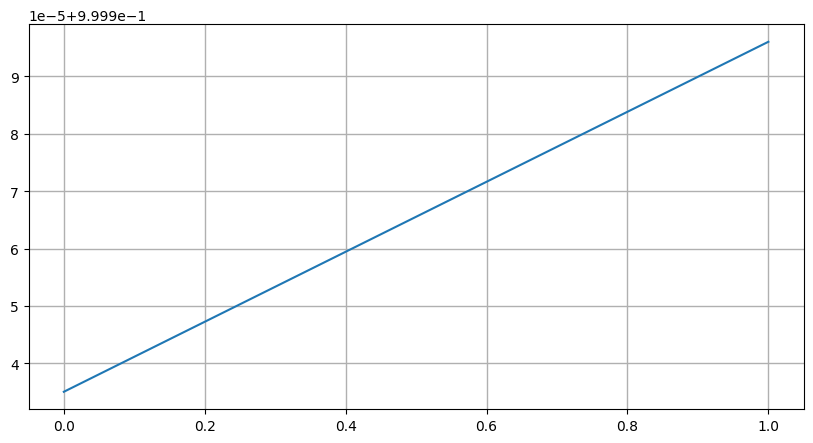

In [ ]:
model_PCA = PCA(n_components=2)
XPCA = model_PCA.fit_transform(X)
print(XPCA.shape)
loadings = model_PCA.components_

#Se reduce la dimensionalidad a 2 componentes, los cuales
#son una combinacion de las caracteristicas originales
# Imprimir las cargas de las características sobre los nuevos PC
for i, componente in enumerate(loadings):
    print(f"Cargas del Componente Principal {i+1}:")
    for j, carga in enumerate(componente):
        print(f"Característica {j+1}: {carga}")

plt.figure(figsize=(10, 5))
plt.plot(np.arange(XPCA.shape[1]), np.cumsum(model_PCA.explained_variance_ratio_))
plt.grid(linestyle='-', linewidth=1)
plt.show()


In [ ]:
print(grades_df.head(5))

   user_id  sex  height  weight   age  years_cl  grades_count  grades_first  \
0        1    0     177      73  41.0        21            84            36   
1        3    0     180      78  44.0        22            12            53   
2        4    1     165      58  33.0        16           119            53   
3       10    0     167      63  52.0        25           298            53   
4       16    0     177      68  44.0        21             5            53   

   grades_last  grades_mean  year_first  year_last  grades_max  
0           55    46.750000        1999       2001          62  
1           51    52.833333        1999       2000          59  
2           49    53.890756        2004       2009          64  
3           49    49.406040        2000       2017          63  
4           49    51.400000        1998       2010          53  


(10927, 12)


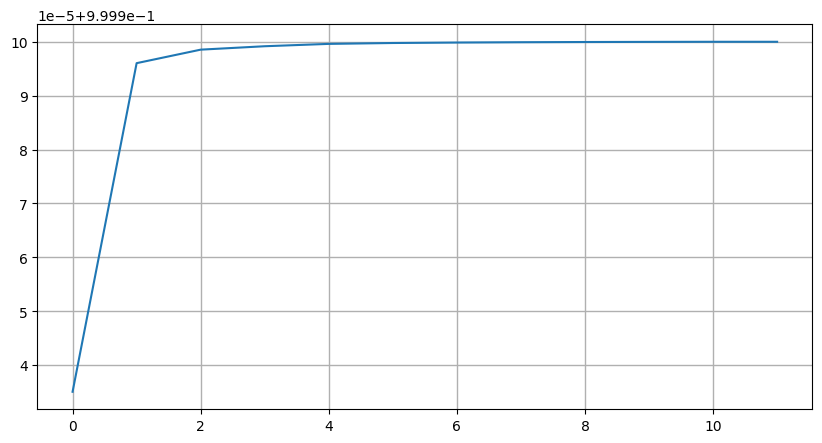

In [ ]:
model = PCA()
X2 = model.fit_transform(X)
print(X2.shape)

plt.figure(figsize=(10,5))
plt.plot( np.arange(X.shape[1]), np.cumsum(model.explained_variance_ratio_))
plt.grid(linestyle='-',linewidth=1)
plt.show()

In [ ]:
varexp = np.round(model.explained_variance_ratio_)
cvarexp = np.round(np.cumsum(model.explained_variance_ratio_), 2)
print(varexp) # LA varianza de cada variable
print(cvarexp) # La varianza acumulada, para ver hasta que variable nos conviene tomar.


[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


##Training and evaluating the model

In [ ]:
#X = np.concatenate((XPCA, XPCA**2), axis=1)

Xtrain, Xtest, ytrain, Ytest = train_test_split(X, Y, test_size=0.30, random_state=0)

#Comparación de diferentes modelos de Regression

mae: 9.49
mse: 148.54
R2: -0.56


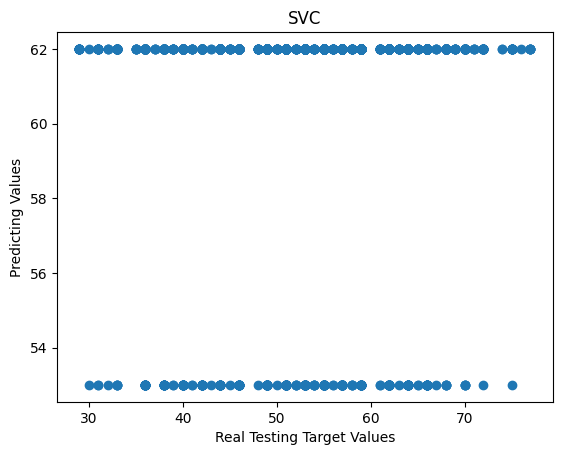

mae: 1.65
mse: 5.28
R2: 0.94


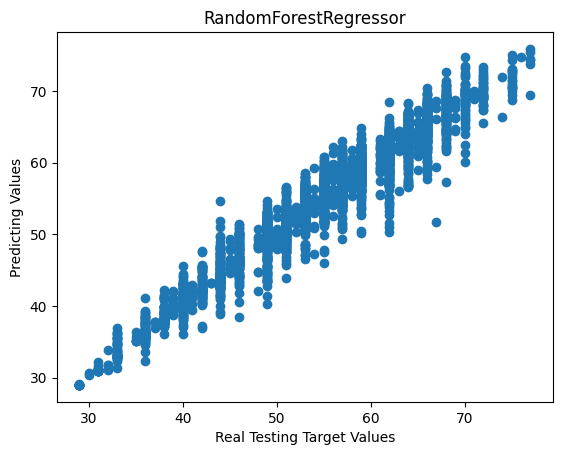

mae: 4.00
mse: 27.79
R2: 0.71


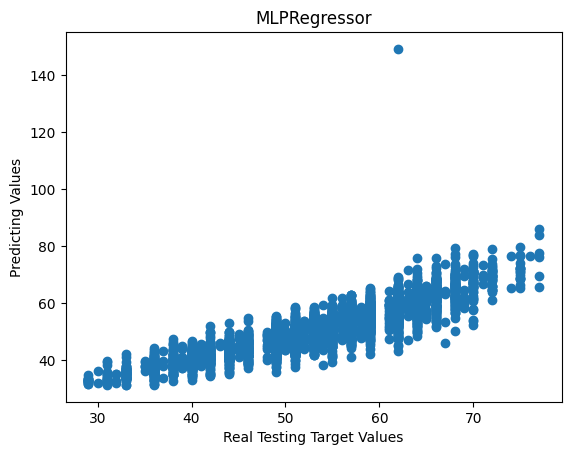

mae: 6.54
mse: 65.89
R2: 0.31


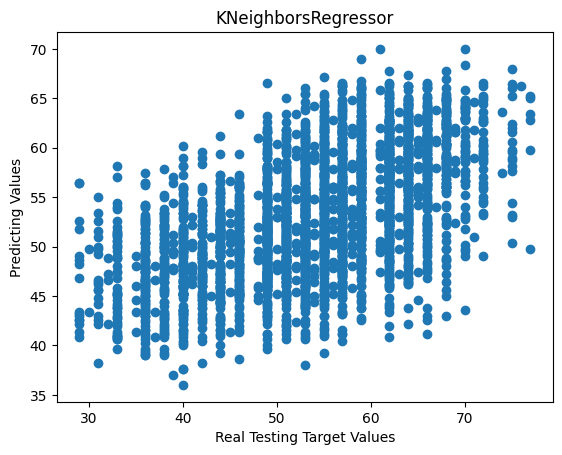

mae: 2.98
mse: 14.16
R2: 0.85


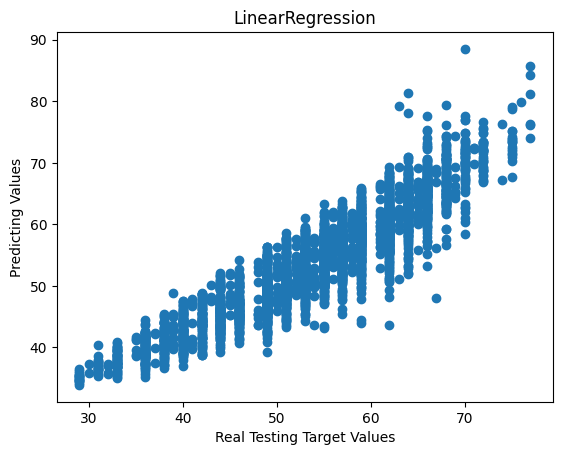

In [ ]:
Regressors = [
    SVC(),
    RandomForestRegressor(),
    MLPRegressor(),
    KNeighborsRegressor(),
    LinearRegression()
]
regressorsNames = [
    "SVC",
    "RandomForestRegressor",
    "MLPRegressor",
    "KNeighborsRegressor",
    "LinearRegression"
]
r2_scores = []
predicts = []

i = 0
for model in Regressors:
  model.fit(Xtrain, ytrain)
  y_pred = model.predict(Xtest)
  predicts.append(y_pred)
  mae = mean_absolute_error(Ytest, y_pred)
  mse = mean_squared_error(Ytest, y_pred)
  r2 = r2_score(Ytest, y_pred)
  r2_scores.append(r2)

  print(f"mae: {mae:.2f}")
  print(f"mse: {mse:.2f}")
  print(f"R2: {r2:.2f}")
  # plot the scatter plot
  plt.scatter(Ytest, y_pred)
  plt.xlabel("Real Testing Target Values")
  plt.ylabel("Predicting Values")
  plt.title(regressorsNames[i])
  plt.show()
  i += 1

#Mostrar estadísticas de escaladores.

El país que tiene mayores grados escalados, sumatoria.

Relación peso - altura.

Relación cuantos son mujeres y cuantos hombres.

Distribución de los grados escalados.

#Distribución de grados en el dataset.

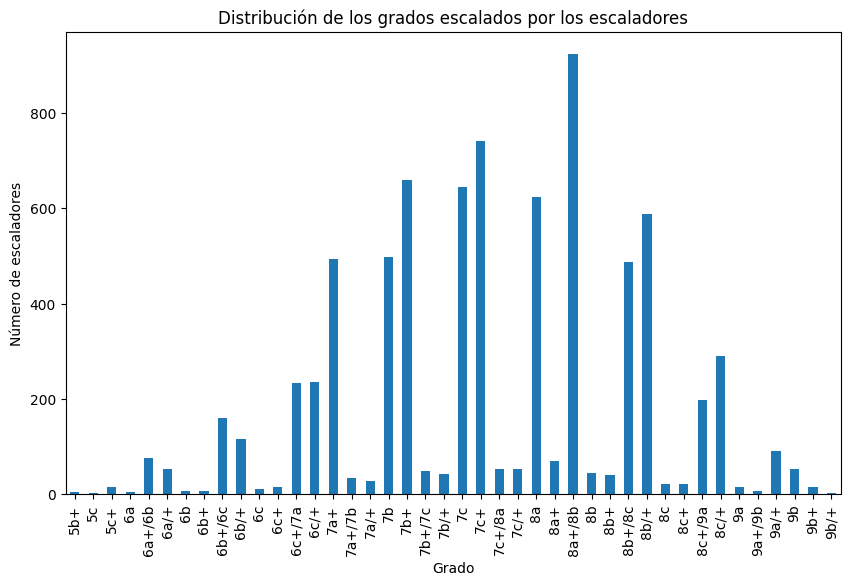

In [ ]:
distribucion_grados = climber_all_clean['max_fra'].value_counts().sort_index()

# Configurar la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Graficar la distribución de los grados
distribucion_grados.plot(kind='bar', ax=ax)

ax.set_xlabel('Grado')
ax.set_ylabel('Número de escaladores')
ax.set_title('Distribución de los grados escalados por los escaladores')

plt.xticks(rotation='vertical')
plt.show()

In [ ]:
escaladores_mex = climber_all_clean.loc[climber_all_clean['country'] == 'MEX']
print(escaladores_mex)


      Unnamed: 0 country  sex  height  weight   age  years_cl  grades_max  \
114          114     MEX    0     186      73  33.0         8          59   
550          550     MEX    0     178      73  39.0        16          53   
712          712     MEX    0     166      58  32.0        18          62   
793          793     MEX    0     176      68  31.0        13          68   
805          805     MEX    0     173      63  24.0        13          75   
...          ...     ...  ...     ...     ...   ...       ...         ...   
7160        7160     MEX    1     172      53  30.0         6          57   
7226        7226     MEX    1     157      53  32.0         3          46   
7241        7241     MEX    1     163      48  30.0         9          62   
7368        7368     MEX    1     160      58  24.0         5          57   
7661        7661     MEX    1     156      58  26.0         4          38   

      grades_mean  year_last max_fra  
114     46.851852       2004      8a

Grados máximos por pais


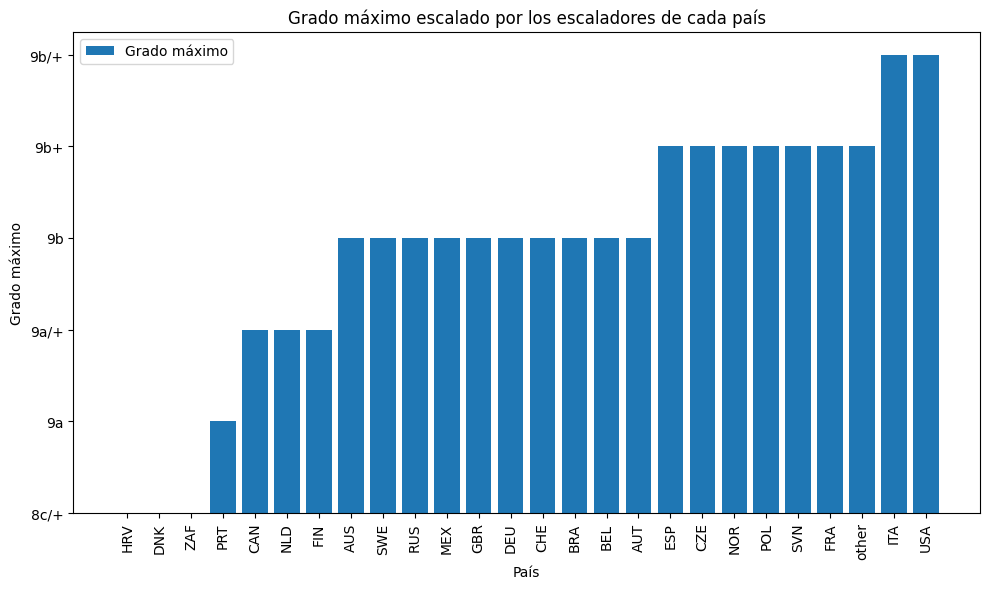

In [ ]:
orden_grados = ['8c/+', '9a', '9a/+', '9b', '9b/+', '9b+']

# Filtrar los escaladores únicos de cada país con su grado máximo y establecer el orden de los grados máximos
escaladores_pais_max = climber_all_clean.groupby('country')['max_fra'].max().reset_index()
escaladores_pais_max['max_fra'] = pd.Categorical(escaladores_pais_max['max_fra'], ordered=True)
escaladores_pais_max = escaladores_pais_max.sort_values('max_fra')

# Filtrar y ordenar la cantidad de escaladores por grado máximo
escaladores_pais_max_count = climber_all_clean.groupby(['country', 'max_fra']).size().reset_index(name='count')
escaladores_pais_max_count['max_fra'] = pd.Categorical(escaladores_pais_max_count['max_fra'], categories=orden_grados, ordered=True)
escaladores_pais_max_count = escaladores_pais_max_count.sort_values('max_fra')

# Configurar la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Graficar los grados máximos
ax.bar(escaladores_pais_max['country'], escaladores_pais_max['max_fra'], label='Grado máximo')

# Etiquetas y título
ax.set_xlabel('País')
ax.set_ylabel('Grado máximo')
ax.set_title('Grado máximo escalado por los escaladores de cada país')

# Mostrar la cantidad de escaladores por grado máximo
for i, row in escaladores_pais_max_count.iterrows():
    country = row['country']
    max_fra = row['max_fra']
    count = row['count']
    #ax.annotate(text=str(count), xy=(country, max_fra), xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')

# Ajustar las etiquetas del eje x en caso de muchos países
plt.xticks(rotation='vertical')

# Mostrar la leyenda y ajustar el diseño
ax.legend()
plt.tight_layout()

# Mostrar la gráfica
plt.show()

Relación peso altura y grado máximo.

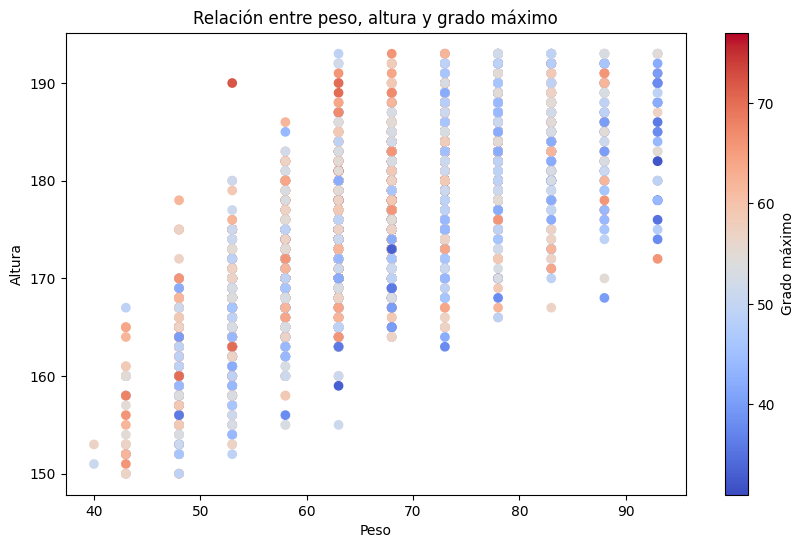

In [ ]:
data = climber_all_clean[['height', 'weight', 'grades_max']]
grades_mean = grades_df['grades_mean']

# Configurar la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Graficar la relación entre el peso, la altura y el grado máximo
scatter = ax.scatter(data['weight'], data['height'], c=data['grades_max'], cmap='coolwarm')

cbar = plt.colorbar(scatter) # Añadir una barra de color para el grado máximo
cbar.set_label('Grado máximo')

ax.set_xlabel('Peso')
ax.set_ylabel('Altura')
ax.set_title('Relación entre peso, altura y grado máximo')
plt.show()

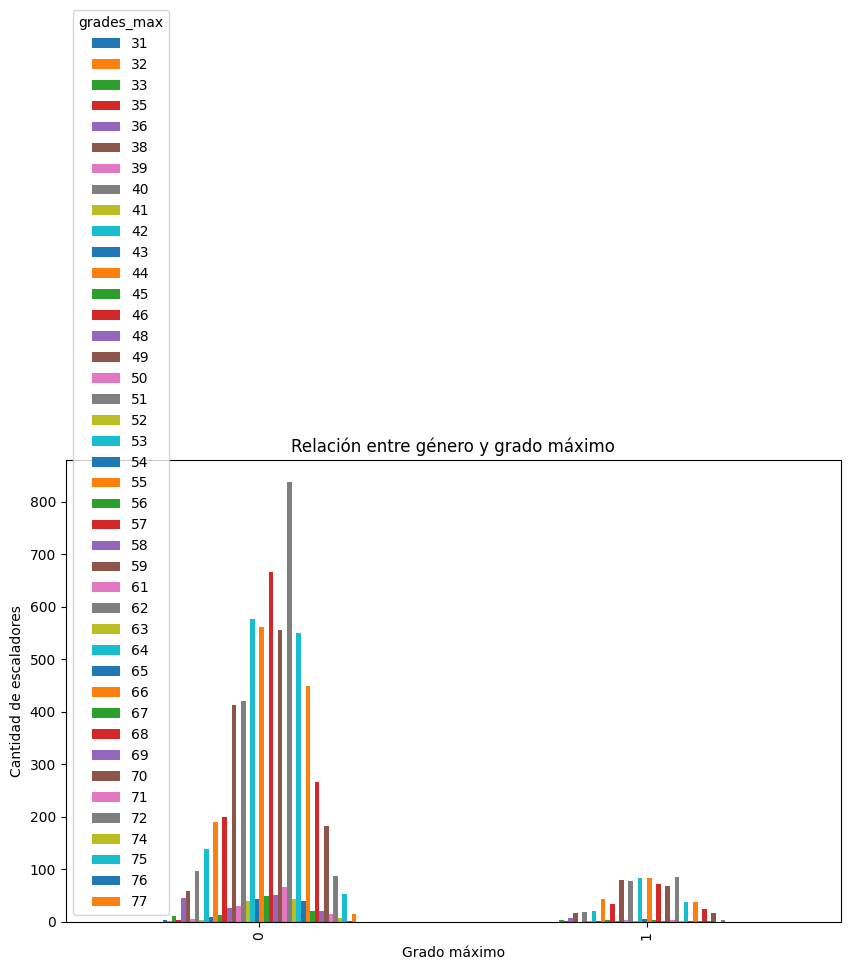

In [ ]:
conversion_df = pd.read_csv('/content/drive/MyDrive/IA/6to sem/Machine Learning/Proyecto Final/Archives/grades_conversion_table.csv')

data = climber_all_clean[['sex', 'grades_max']]
grades_mean = grades_df['grades_mean']

# Agrupar los datos por género y grado máximo y contar la cantidad de escaladores
grouped_data = data.groupby(['sex', 'grades_max']).size().unstack()

# Configurar la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Graficar los datos
grouped_data.plot(kind='bar', ax=ax)

# Etiquetas y título
ax.set_xlabel('Grado máximo')
ax.set_ylabel('Cantidad de escaladores')
ax.set_title('Relación entre género y grado máximo')

# Mostrar la gráfica
plt.show()


In [ ]:
print(conversion_df)

    Unnamed: 0  grade_id grade_fra
0            0         0         -
1            1         1         -
2            2         2         -
3            3         3         1
4            4         4        1a
..         ...       ...       ...
80          80        80    9b+/9c
81          81        81        9c
82          82        82      9c/+
83          83        83       9c+
84          84        84   9c+/10a

[85 rows x 3 columns]


In [ ]:
# Función para buscar una persona por su ID y hacer una predicción
def predecir_grades_max(user_id):
    persona = preprocessed_grades[preprocessed_grades['user_id'] == user_id]
    if persona.empty:
        print(f"No se encontró la persona con ID {user_id}.")
    else:
        #X_persona = persona[features]
        persona.drop('user_id', axis=1)
        prediccion = Regressors[1].predict(persona)
        print(f"Predicción de grades_max para la persona con ID {user_id}: {prediccion[0]}")

In [ ]:
# Ejemplo de uso: buscar a la persona con ID 4 y hacer una predicción
predecir_grades_max(4)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


ValueError: ignored

In [ ]:
gradeslast = pd.read_csv('/content/drive/MyDrive/IA/6to sem/Machine Learning/Proyecto Final/Climbing-Data-Analysis/data/climber_df.csv')
print(gradeslast.head(5))
print(gradeslast['user_id'])
persona = gradeslast[gradeslast['user_id'] == user_id]

In [ ]:
print(persona)